<a href="https://colab.research.google.com/github/Adimaster1/Adimaster1/blob/main/Devsoc_Quant_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier






In [71]:
ticker="AAPL"
data=yf.download(ticker,start="2018-01-01",end="2024-01-01")
data=data[["Close", "Volume"]]
data.dropna(inplace=True)

/tmp/ipython-input-2377769883.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start="2018-01-01",end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [72]:
data["return"]=data["Close"].pct_change()
data["volume_change"]=data["Volume"].pct_change()
data["target"]=data["return"].shift(-1)#predicting for next day
data["target_cls"]=(data["target"]>0).astype(int)
data.replace([np.inf,-np.inf],np.nan,inplace=True)
data.dropna(inplace=True)
data.head()

Price,Close,Volume,return,volume_change,target,target_cls
Ticker,AAPL,AAPL,,,,
Date,,,,,,
2018-01-03,40.334866,118071600,-0.000174,0.155033,0.004645,1
2018-01-04,40.522217,89738400,0.004645,-0.239966,0.011385,1
2018-01-05,40.983574,94640000,0.011385,0.054621,-0.003714,0
2018-01-08,40.831341,82271200,-0.003714,-0.130693,-0.000115,0
2018-01-09,40.826664,86336000,-0.000115,0.049407,-0.000230,0


In [73]:
split=int(0.7*len(data)) #first 70 % of data is training data
train=data.iloc[:split]
test=data.iloc[split:]
X_train=train[["return","volume_change"]]
X_test=test[["return","volume_change"]]
y_train=train["target"]
y_train_cls=train["target_cls"]
y_test_cls =test["target_cls"]
data.head()

Price,Close,Volume,return,volume_change,target,target_cls
Ticker,AAPL,AAPL,,,,
Date,,,,,,
2018-01-03,40.334866,118071600,-0.000174,0.155033,0.004645,1
2018-01-04,40.522217,89738400,0.004645,-0.239966,0.011385,1
2018-01-05,40.983574,94640000,0.011385,0.054621,-0.003714,0
2018-01-08,40.831341,82271200,-0.003714,-0.130693,-0.000115,0
2018-01-09,40.826664,86336000,-0.000115,0.049407,-0.000230,0


In [74]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [75]:
test["predicted_return"] = model_lr.predict(X_test)
test["signal"] = (test["predicted_return"] > 0).astype(int)

/tmp/ipython-input-4011953888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_return"] = model_lr.predict(X_test)
/tmp/ipython-input-4011953888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["signal"] = (test["predicted_return"] > 0).astype(int)


In [76]:
intercept = model_lr.intercept_
coefficients = model_lr.coef_

print("Intercept:",intercept)

for feature, coef in zip(X_train.columns,coefficients):
  print(f"{feature}: {coef}")

Intercept: 0.0015557707409615499
('return', ''): -0.12450740170962005
('volume_change', ''): 0.0021444506601203993


In [77]:
test["predicted_return"] = model_lr.predict(X_test)
test["signal"] = (test["predicted_return"] > 0).astype(int)

/tmp/ipython-input-4011953888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_return"] = model_lr.predict(X_test)
/tmp/ipython-input-4011953888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["signal"] = (test["predicted_return"] > 0).astype(int)


In [78]:
test #testing data

Price,Close,Volume,return,volume_change,target,target_cls,predicted_return,signal
Ticker,AAPL,AAPL,,,,,,
Date,,,,,,,,
2022-03-11,151.743927,96970100,-0.023909,-0.079474,-0.026563,0,0.004362,1
2022-03-14,147.713226,108732100,-0.026563,0.121295,0.029677,1,0.005123,1
2022-03-15,152.096939,92964300,0.029677,-0.145015,0.029016,1,-0.002450,0
2022-03-16,156.510132,102300200,0.029016,0.100425,0.006454,1,-0.001842,0
2022-03-17,157.520233,75615400,0.006454,-0.260848,0.020919,1,0.000193,1
...,...,...,...,...,...,...,...,...
2023-12-21,192.858643,46482500,-0.000770,-0.110260,-0.005548,0,0.001415,1
2023-12-22,191.788757,37149600,-0.005548,-0.200783,-0.002841,0,0.001816,1


In [79]:
test["strategy_return"] = test["signal"].shift(1) * test["return"]

/tmp/ipython-input-3559437666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["strategy_return"] = test["signal"].shift(1) * test["return"]


LRCAGR: 0.24922426075524196
LRSharpe: 1.0152213438107385
LRMaxDD: -0.23548740737666463


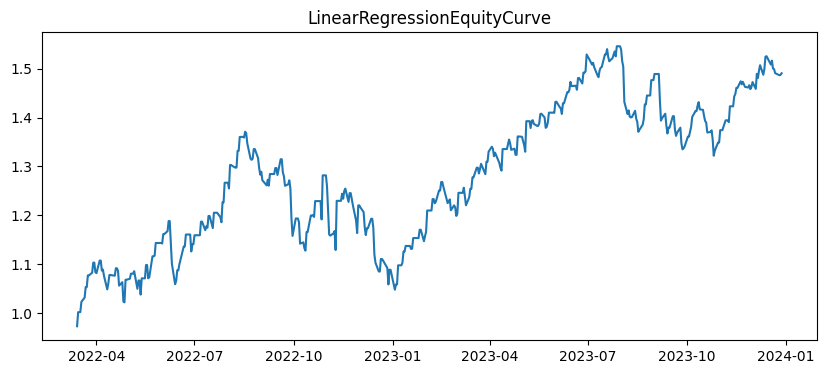

In [80]:
TRADING_DAYS=252
lr_returns =test["strategy_return"].dropna()
lr_equity=(1+lr_returns).cumprod()
lr_cagr=(1+lr_returns).prod()**(TRADING_DAYS/len(lr_returns))-1#compounded annual growth rate
lr_sharpe=np.sqrt(TRADING_DAYS)*lr_returns.mean()/lr_returns.std()#risk-adjusted return
lr_dd=lr_equity/lr_equity.cummax()-1
lr_max_dd=lr_dd.min()#since value is negative
print("LRCAGR:",lr_cagr)
print("LRSharpe:",lr_sharpe)
print("LRMaxDD:",lr_max_dd)
plt.figure(figsize=(10,4))
plt.plot(lr_equity)
plt.title("LinearRegressionEquityCurve")
plt.show()

In [81]:
model_xgb=XGBClassifier(
n_estimators=950,
max_depth=4,
learning_rate=0.15,
subsample=0.8,#portion of data for training
colsample_bytree=0.8,#prevents overfitting (see how)
eval_metric="logloss",#SEE LOGLOSS
random_state=42
)
model_xgb.fit(X_train,y_train_cls)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=950, n_jobs=None,
              num_parallel_tree=None, ...)

In [82]:
test["signal"] = model_xgb.predict(X_test)
test["strategy_return"] = test["signal"].shift(1) * test["return"]

/tmp/ipython-input-1860241908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["signal"] = model_xgb.predict(X_test)
/tmp/ipython-input-1860241908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["strategy_return"] = test["signal"].shift(1) * test["return"]


In [83]:
xgb_returns=test["strategy_return"].dropna()
xgb_equity =(1+xgb_returns).cumprod()
xgb_cagr= (1+xgb_returns).prod()**(TRADING_DAYS/len(xgb_returns))-1
xgb_sharpe =np.sqrt(TRADING_DAYS)*xgb_returns.mean()/xgb_returns.std()
xgb_dd=xgb_equity/xgb_equity.cummax()-1
xgb_max_dd =xgb_dd.min()
xgb_accuracy=accuracy_score(
y_test_cls,
test.loc[y_test_cls.index,"signal"]
)
print("XGB CAGR:",xgb_cagr)
print("XGB Sharpe:",xgb_sharpe)
print("XGB MaxDD:",xgb_max_dd)
print("XGB Accuracy:",xgb_accuracy)

XGB CAGR: 0.06857513055573006
XGB Sharpe: 0.4070779782152716
XGB MaxDD: -0.22474278706916662
XGB Accuracy: 0.5209713024282561
